In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores-area-and-sales-data/Stores.csv


In [2]:
#importing other releveant tools
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#turning my csv data to a dataframe ...
store_data = pd.read_csv('/kaggle/input/stores-area-and-sales-data/Stores.csv' , index_col = 0)

#what does my data look like?
print(store_data.describe())
print(store_data.head())

        Store_Area  Items_Available  Daily_Customer_Count    Store_Sales
count   896.000000       896.000000            896.000000     896.000000
mean   1485.409598      1782.035714            786.350446   59351.305804
std     250.237011       299.872053            265.389281   17190.741895
min     775.000000       932.000000             10.000000   14920.000000
25%    1316.750000      1575.500000            600.000000   46530.000000
50%    1477.000000      1773.500000            780.000000   58605.000000
75%    1653.500000      1982.750000            970.000000   71872.500000
max    2229.000000      2667.000000           1560.000000  116320.000000
           Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
Store ID                                                                 
1                1659             1961                   530        66490
2                1461             1752                   210        39820
3                1340             1609         

****Notice from the data summary that there are no missing values, so we do not need to worry about that. We can see from the description above that we have data for 896 stores. The mean value for each variable is given in the row titled "mean".
Next, we would want to know how the different variables affect each other.****

****First off, I'm curious about something. From our summary table, we can see that a store has a daily customer count of only 10?! Interesting. Let's see what the rest of the data for that store looks like.****

In [4]:
store_data[store_data['Daily_Customer_Count'] == 10]

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
40,1270,1516,10,45480


****This is really interesting. A store with an average of only 10 daily customers makes more sales than almost 25% percent of the other stores. It might just be located in some boujie area. This particular store compared to others does not have alot of items either, that could be another reason for its low traffic.****

In [5]:
store_data[store_data['Store_Sales']== 116320]

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
650,1989,2414,860,116320


<AxesSubplot:>

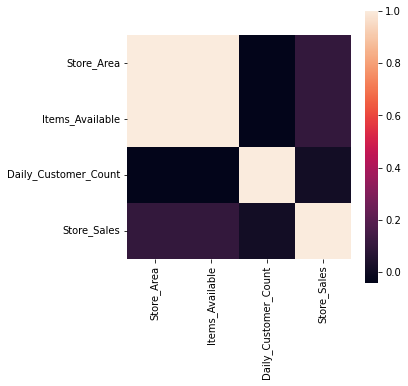

In [6]:
# I will use a Correlation Matrix - Seaborn Heatmap ton see how the different variables affect each other
corrmat = store_data.corr()
plt.subplots(figsize = (5,5))
sns.heatmap(corrmat, square = True)

****From this we can see strong correlation between store area and items available- which makes sense. Here, I think what we can call this is a 'Collinearity'. I would do a plot to shot this more clearly.
What is surprising is that there's too little correlation between items avilable and sales?! I think we might need to dig deeper into that. How about we use a scatter and line plot to investigate the relationship between these two variables?
Another surprising observation is that there is no relationship between daily customer count and sales! I would never have thought. I would not be confirming that with a scatter plot though.****

[]

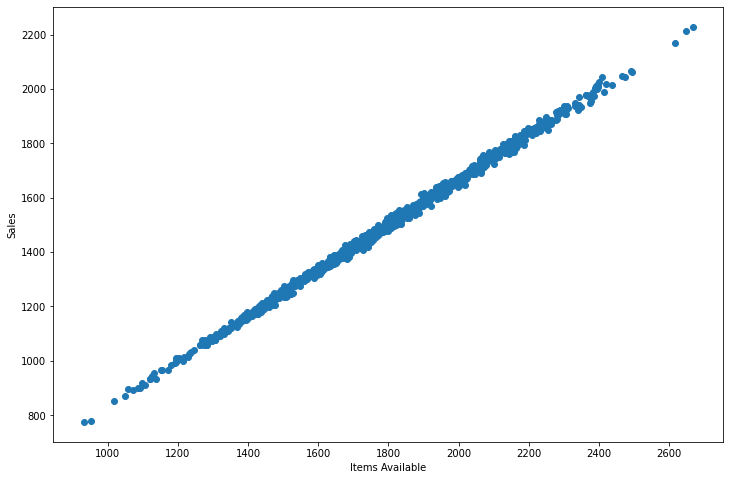

In [7]:
#First, for items availabel and store area...

x = store_data[['Items_Available']]
y = store_data[['Store_Area']]
_ = plt.figure(figsize=(12,8))  #increases the size of my plot
_ = plt.scatter(x , y)
_ = plt.xlabel('Items Available')
_ = plt.ylabel('Sales')
_ = plt.xticks(np.arange(0, 2800 , step = 200))  #gives a range for my x values
_ = plt.yticks(np.arange(0 ,2400 , step = 200))
plt.plot()

****See! Collinearity.****

[]

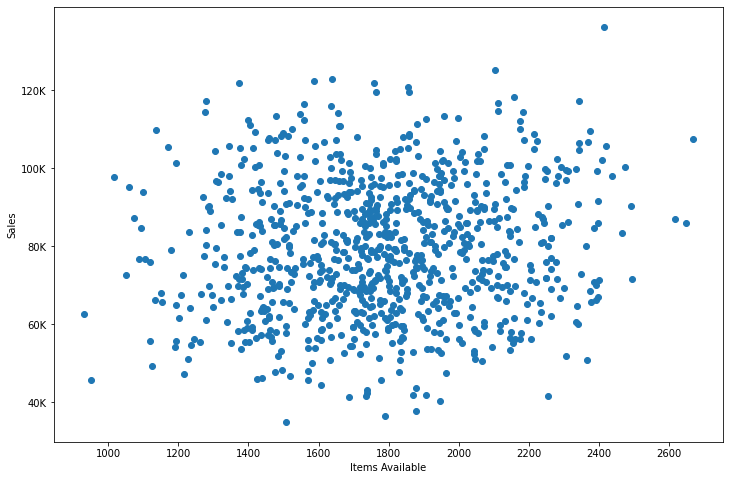

In [8]:
#For items available and sales...

x = store_data[['Items_Available']]
y = store_data[['Store_Sales']]
_ = plt.figure(figsize=(12,8))  #increases the size of my plot
_ = plt.scatter(x , y)
_ = plt.xlabel('Items Available')
_ = plt.ylabel('Sales')
_ = plt.xticks(np.arange(0, 2800 , step = 200))  #gives a range for my x values
_ = plt.yticks(np.arange(0 ,120000 , step = 20000), ['20K' , '40K' , '60K' , '80K' , '100K' , '120K']) 
# code above gives both range and labels for my y values
plt.plot()

****Okay, so there's actually no correlation. Oops. My heatmap was right.
What I can make of this is that some stores stock up items that do very well in sales. All they need is to be able to match the demand for those products and then they are good. ****
